# t-Distributed Stochastic Neighbor Embedding  

Statistical method for visualizing high-dimensional data while preserving clusters

[Explanation by StatQuest](https://www.youtube.com/watch?v=NEaUSP4YerM)

Importing necessary libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_moons, make_circles

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("blend:blue,orange"))

Generating datasets

In [2]:
x_uniform: np.array = np.array([np.random.uniform(-1, 1, 1500), np.random.uniform(-1, 1, 1500)])
x_normal: np.array = np.array([
    np.concatenate([
        np.random.normal(0, .2, 500), 
        np.random.normal(1, .2, 500),
        np.random.normal(-0.7, .2, 500),
        np.random.normal(1, .2, 500)
    ]), 
    np.concatenate([
        np.random.normal(0, .2, 500), 
        np.random.normal(1, .2, 500),
        np.random.normal(-2, .2, 500),
        np.random.normal(0, .2, 500)
    ])])
x_circles = make_circles((500, 200), noise=.025)[0].T
x_moons = make_moons((500, 250), noise=.1)[0].T

data = [x_uniform, x_normal, x_circles, x_moons]

Embedding the generated datasets into a single dimension

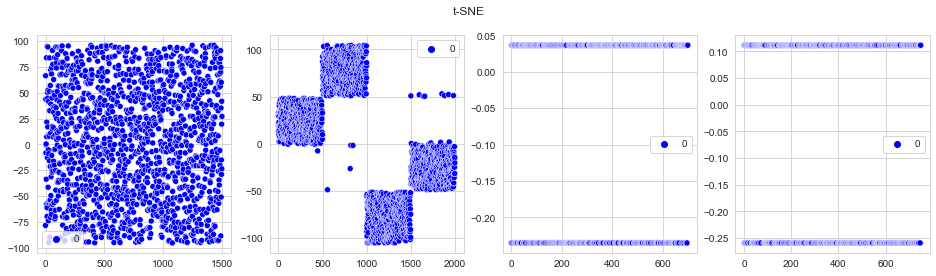

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    
for i, df in enumerate(data):
    tsne = TSNE(1, perplexity=[30, 30, 800, 1000][i])
    embedding = np.sort(tsne.fit_transform(df.T))
    sns.scatterplot(data=embedding, ax=ax[i]);
    
fig.suptitle(f"t-SNE")
plt.show()